# Market Analysis

Instruments to trade: 0, 1, 2, 3, 4, 5, 6, 7, 22, 23, 24, 26, 27

---

We can first start by plotting all the instrument's price data to get a general overview

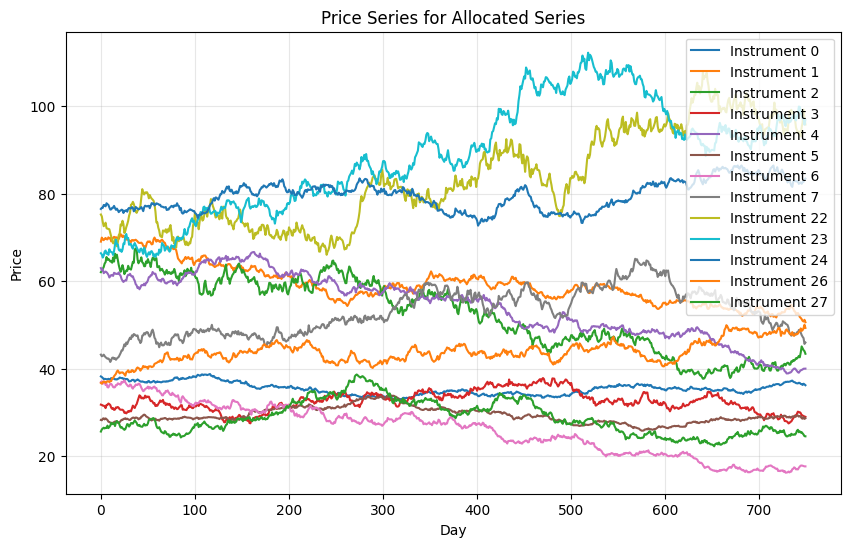

In [2]:
import matplotlib.pyplot as plt
from pandas import DataFrame
import pandas as pd
from numpy import ndarray
from typing import List
import numpy as np

prices_filepath: str = "../prices.txt"
start_day: int = 0
end_day: int = 750
instrument_nos: List[int] = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23, 24, 26, 27]

def plot_price_data_all() -> None:
    # Read the csv
    raw_prices: DataFrame = pd.read_csv(prices_filepath, sep=r"\s+", header=None)
    raw_prices.index.name = "day"
    raw_prices.columns = raw_prices.columns.astype(int)
    
    my_instruments: DataFrame = raw_prices[instrument_nos]
    
    plt.figure(figsize=(10,6))
    for instrument in instrument_nos:
        plt.plot(my_instruments.index, my_instruments[instrument], label=f"Instrument {instrument}")
        
    plt.xlabel("Day")
    plt.ylabel("Price")
    plt.title("Price Series for Allocated Series")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

plot_price_data_all()

It's also wise to calculate the maximum theoretical profit for our test timeline (0 - 375 days), 
and we aim
 to 
meet 
60-70% of this 
number.

In [8]:
from analysis import MarketData
prices_file_path: str = "../prices.txt"

market_data: MarketData = MarketData(0, 749, prices_filepath)
maximum_value: float = market_data.get_maximum_theoretical_value(instrument_nos, 0, 375)

print(f"Maximum theoretical value: ${maximum_value:.2f}")
print(f"60% of maximum theoretical value: ${(maximum_value * 0.6):.2f}")
print(f"70% of maximum theoretical value: ${(maximum_value * 0.7):.2f}")

Maximum theoretical value: $354206.61
60% of maximum theoretical value: $212523.97
70% of maximum theoretical value: $247944.63


# Visualising Momentung and Trends

From the price data plots, it seems as though most of the instruments are trending/momentum based
. We can plot the price data along with short and long EMAs, and pair it with auto-correlation 
graphs to visualise when trending/momentum strategies are ideal

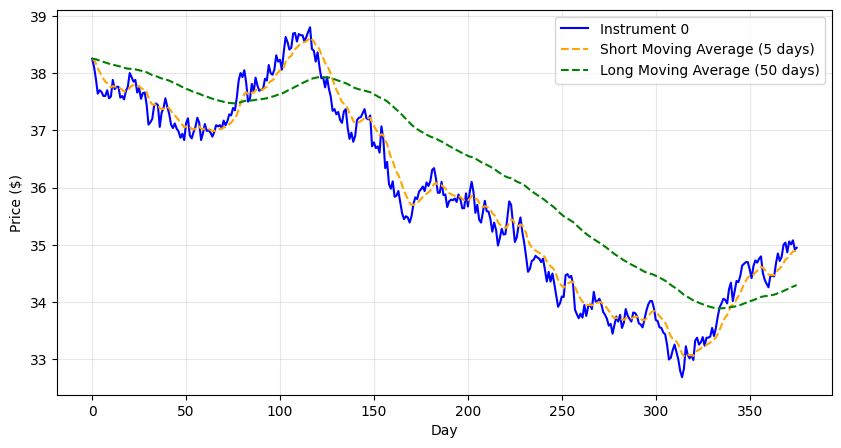

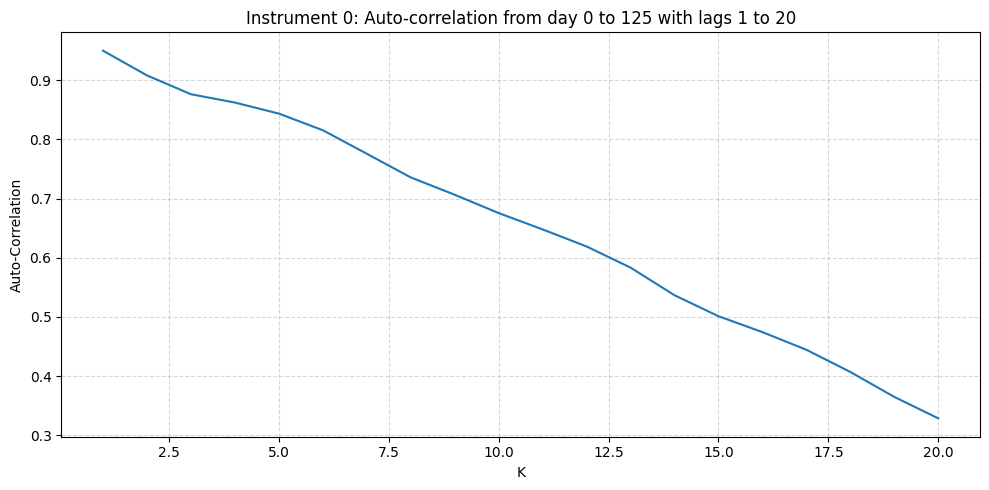

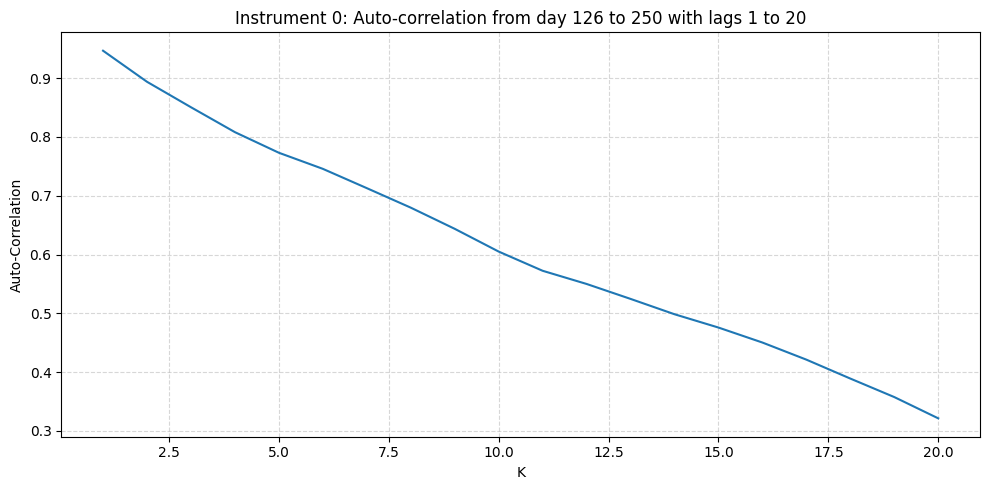

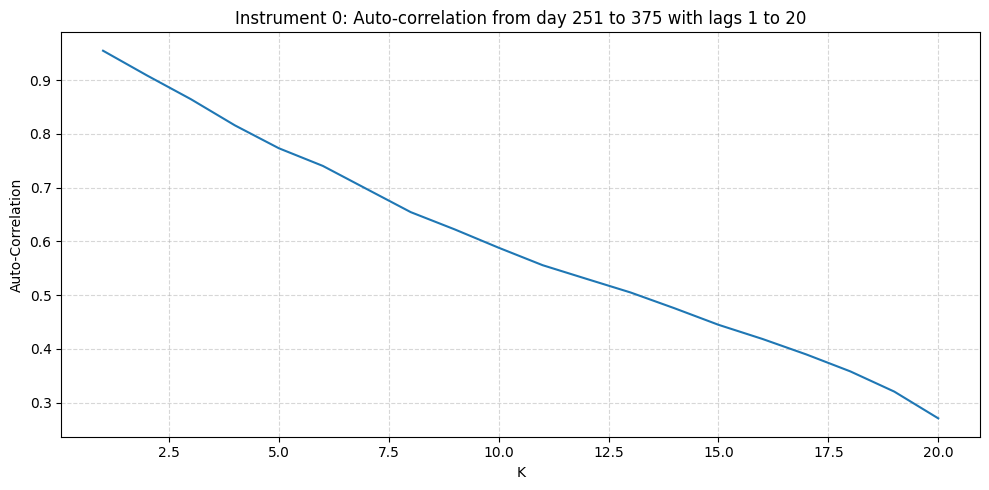

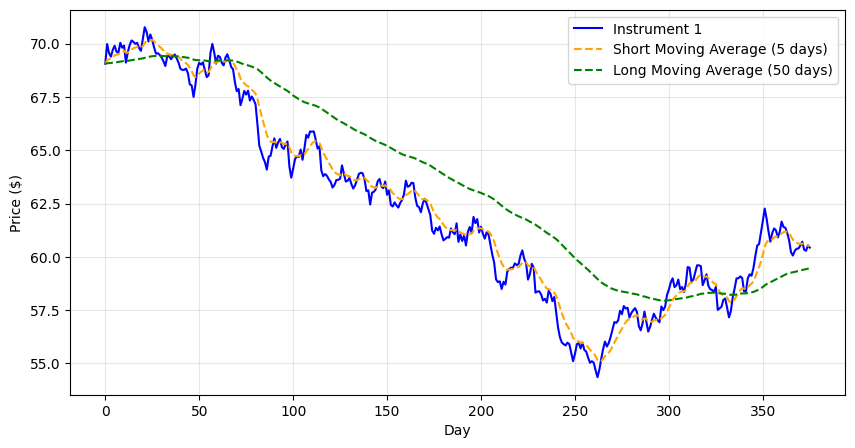

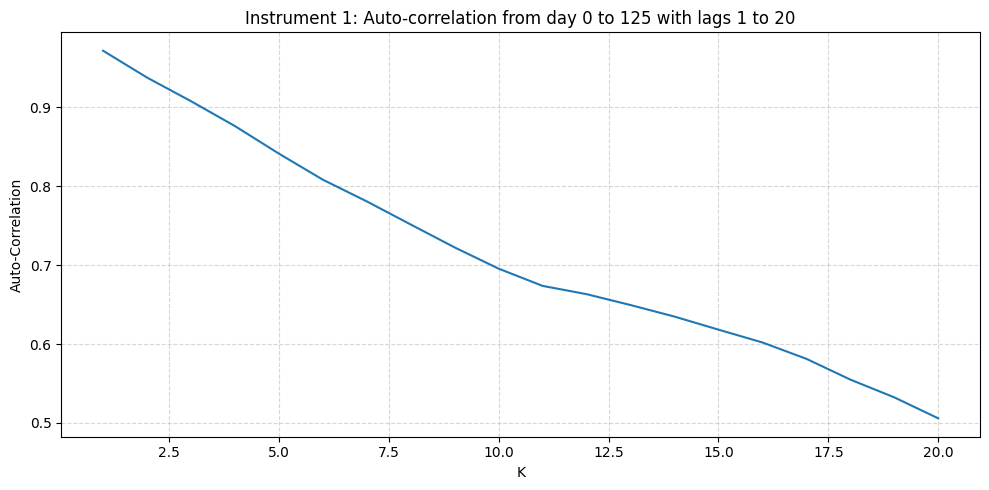

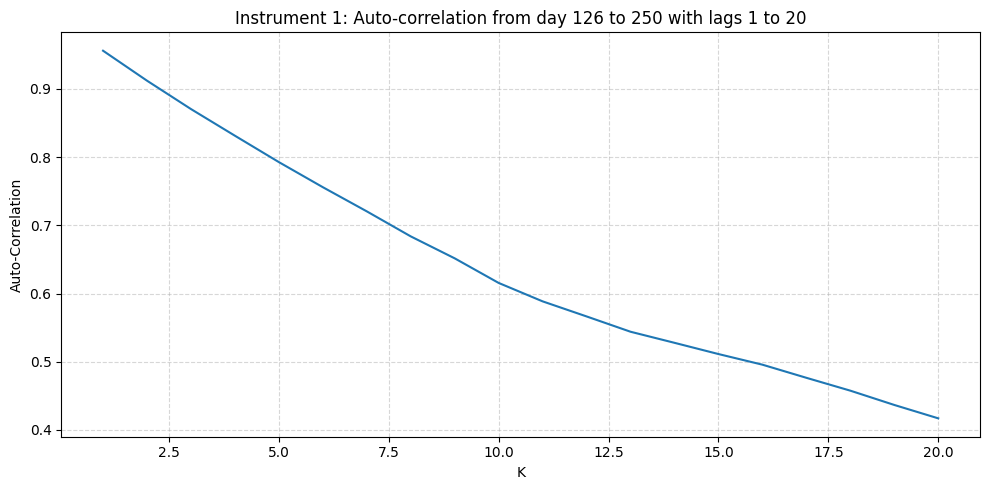

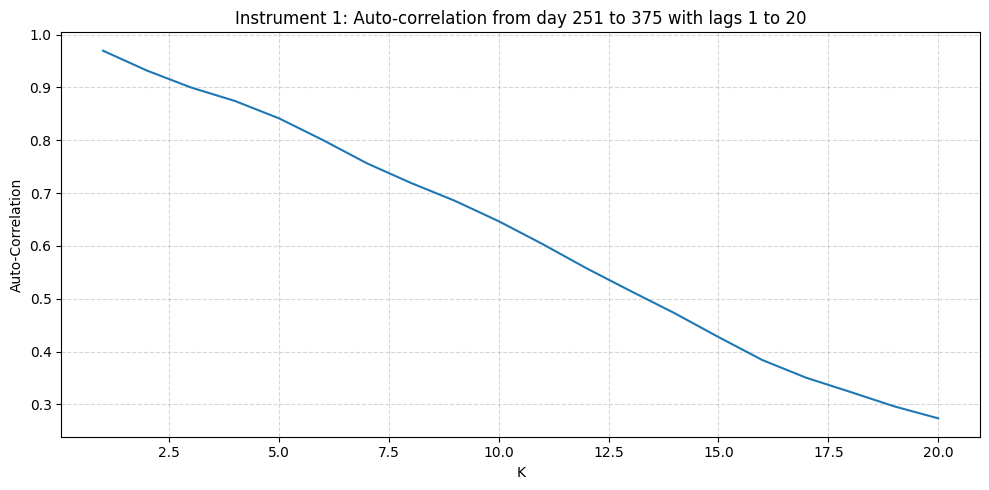

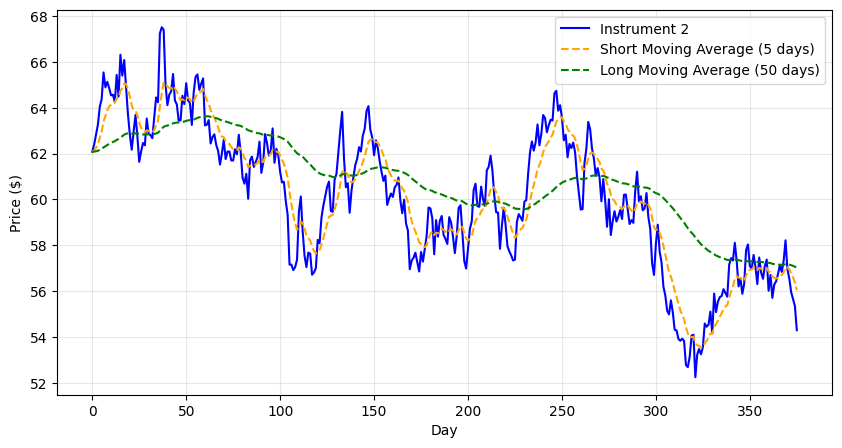

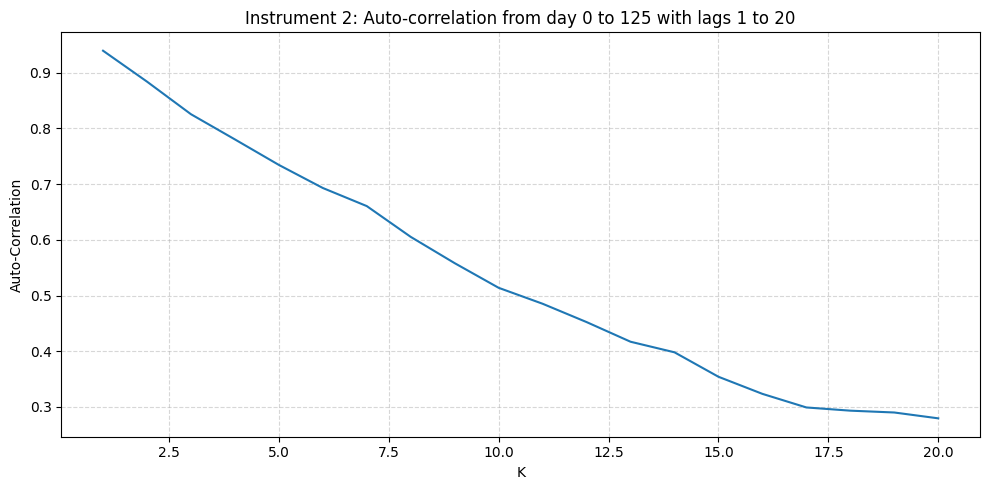

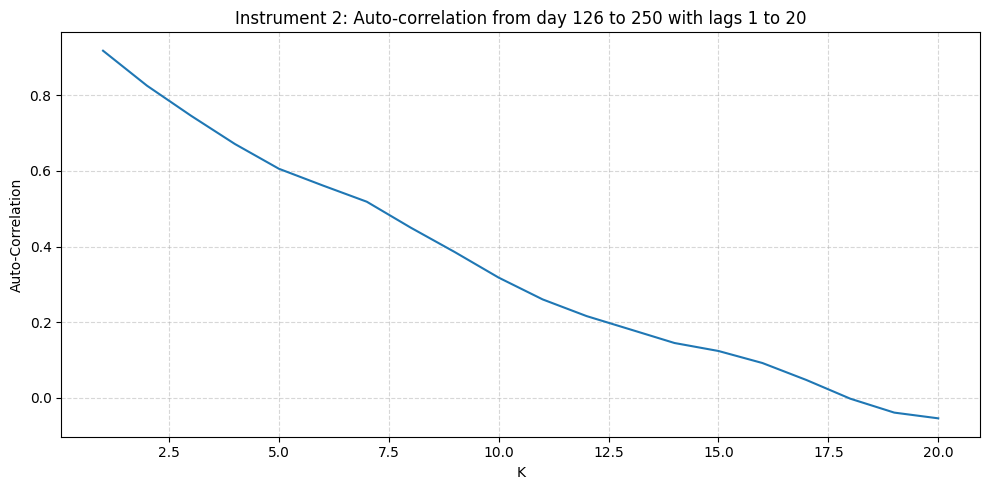

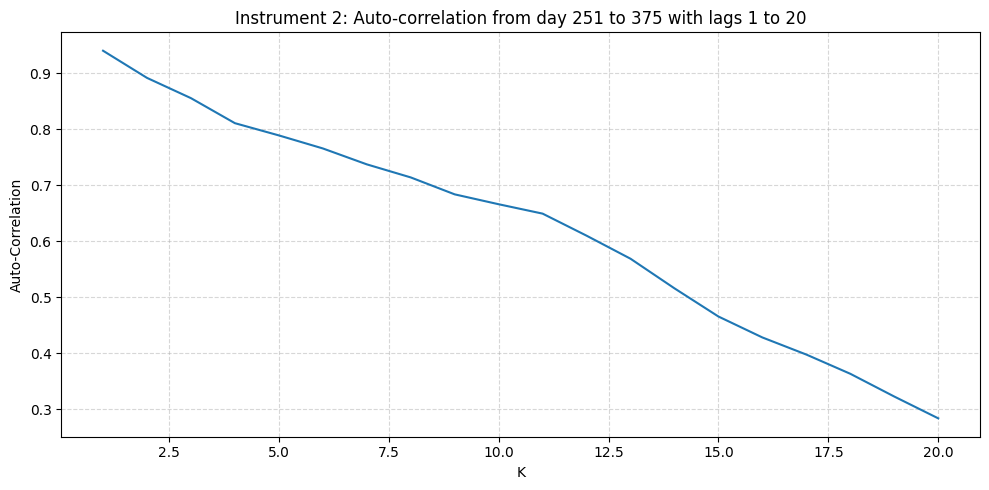

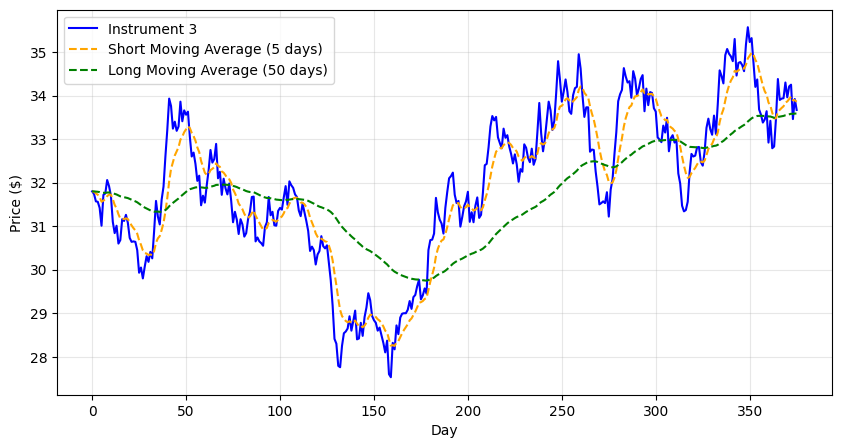

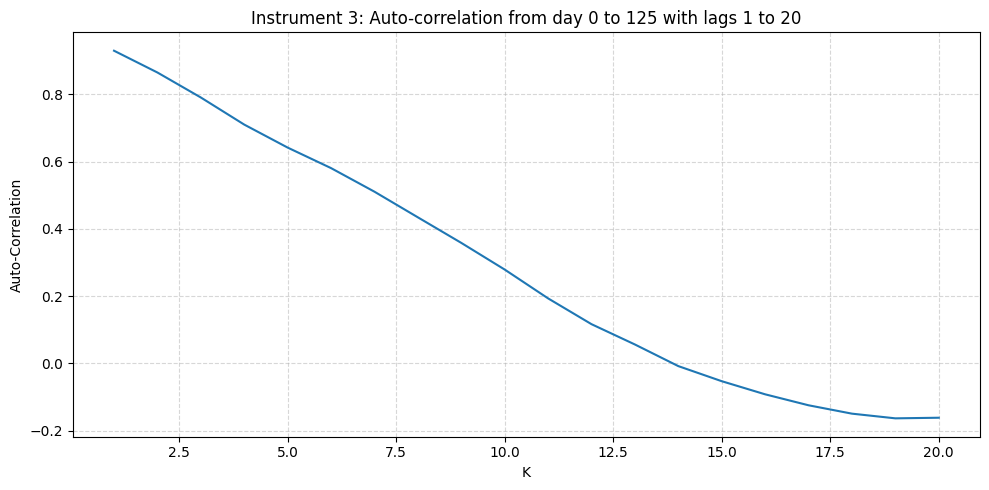

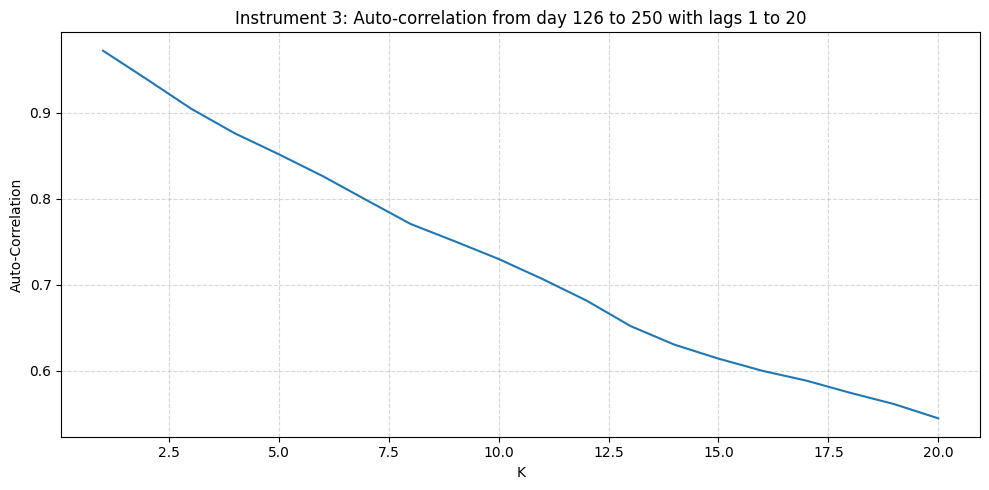

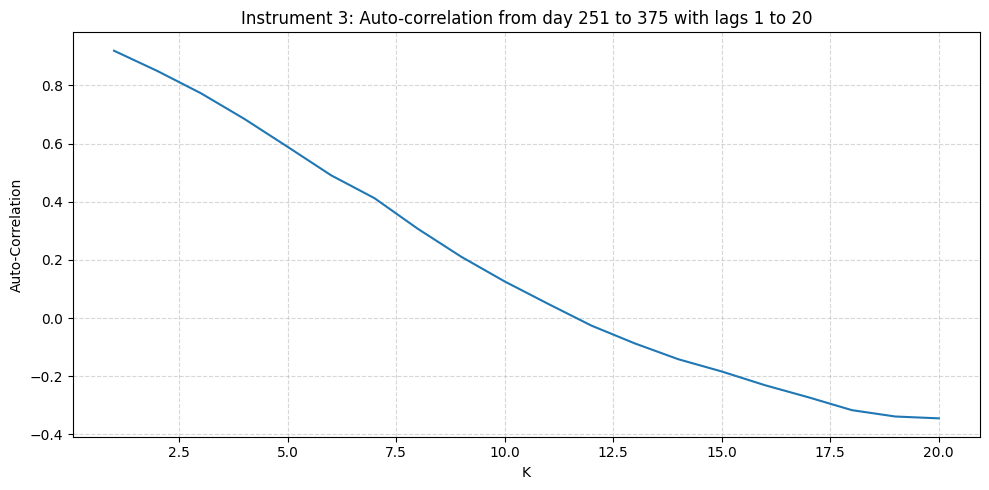

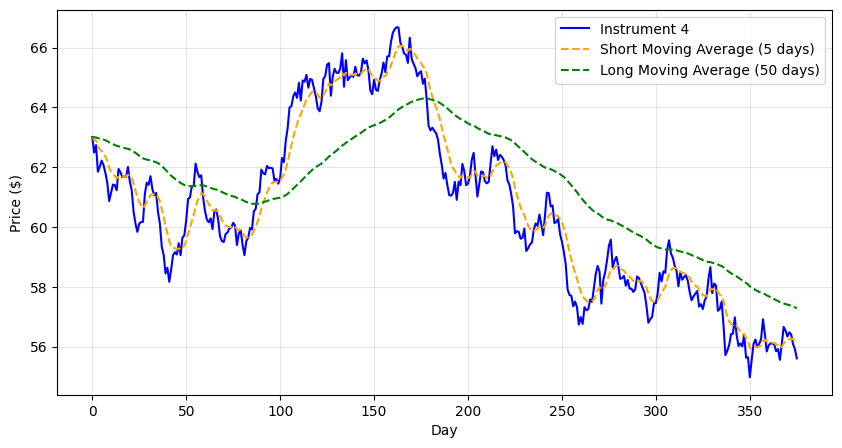

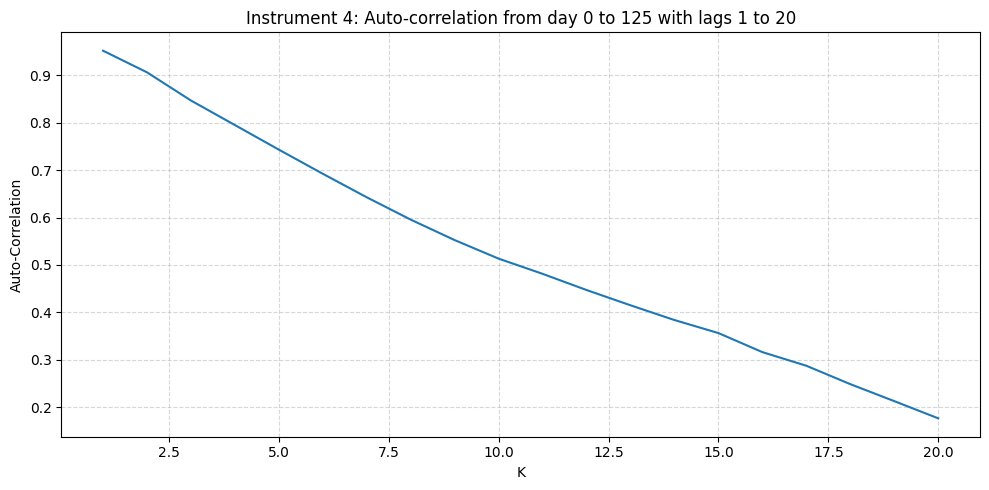

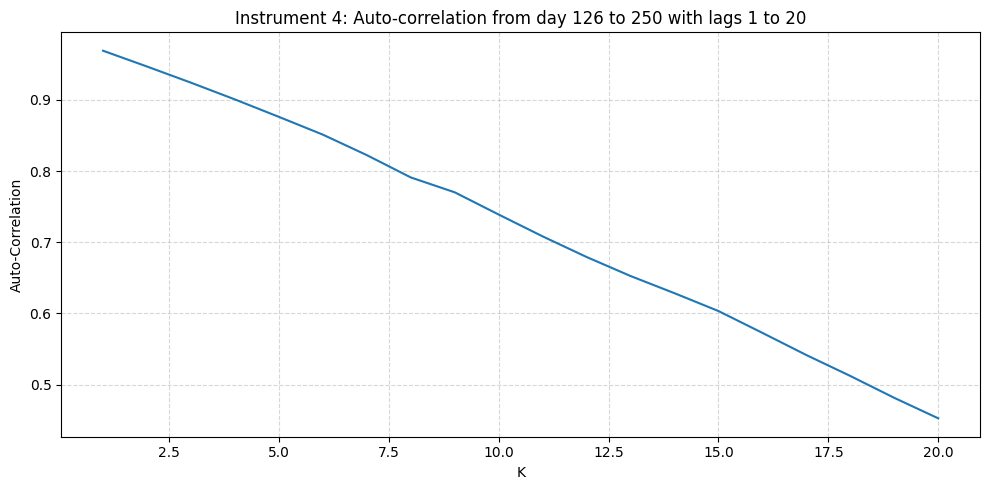

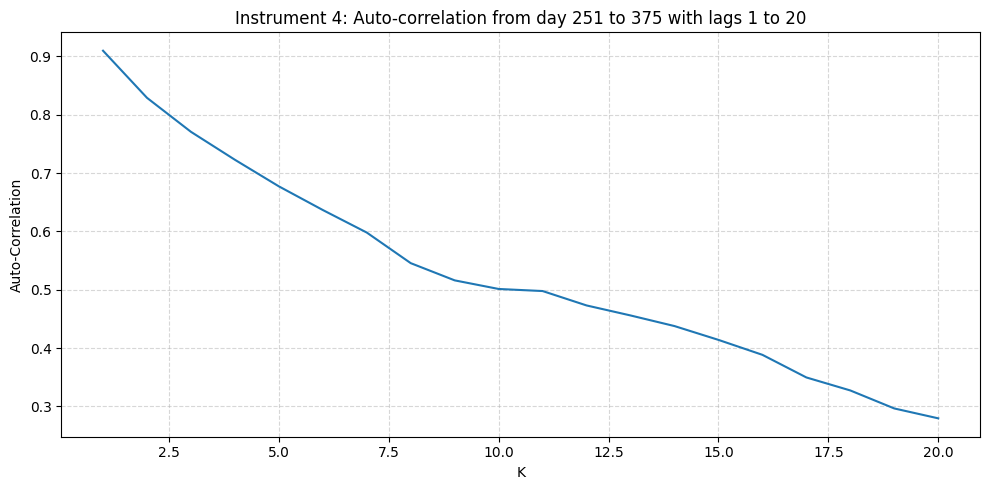

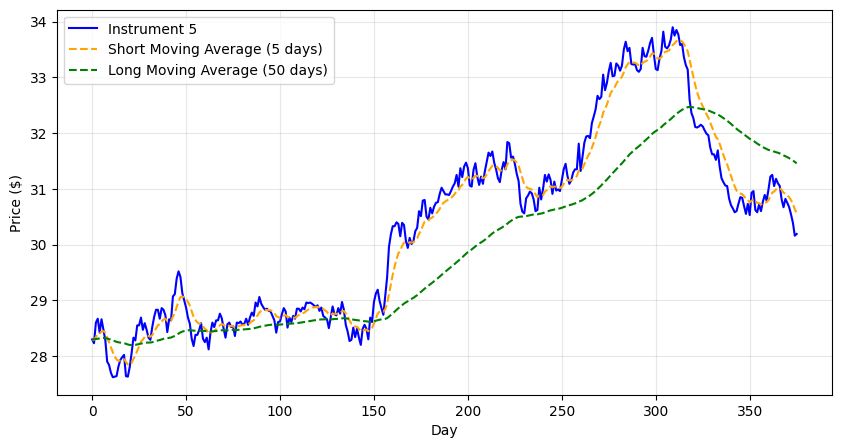

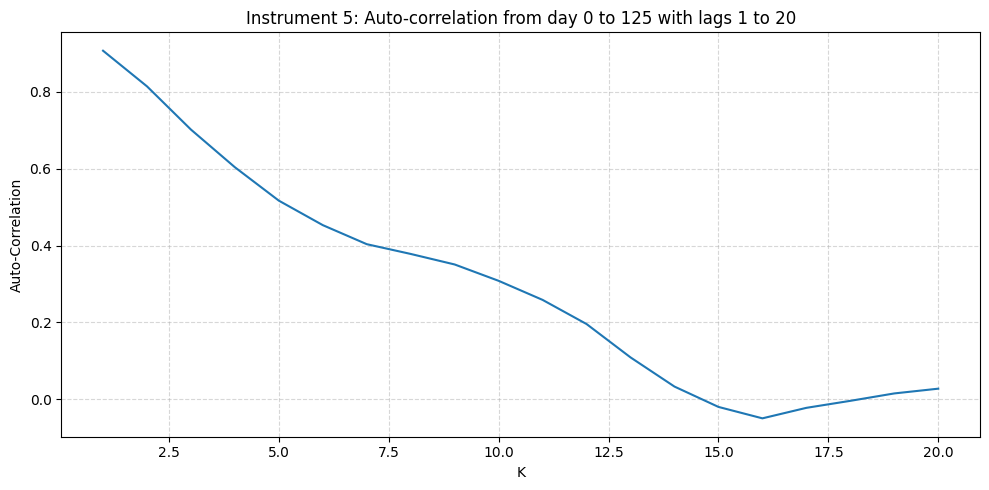

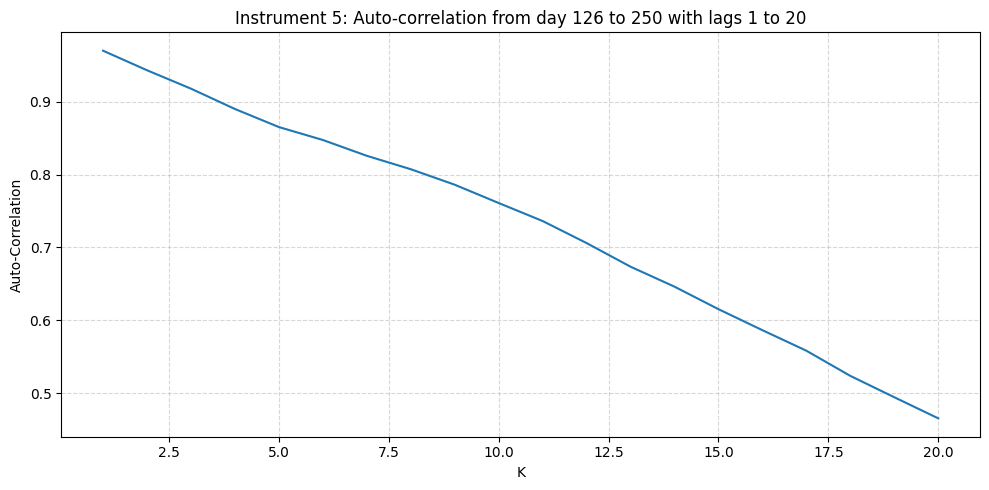

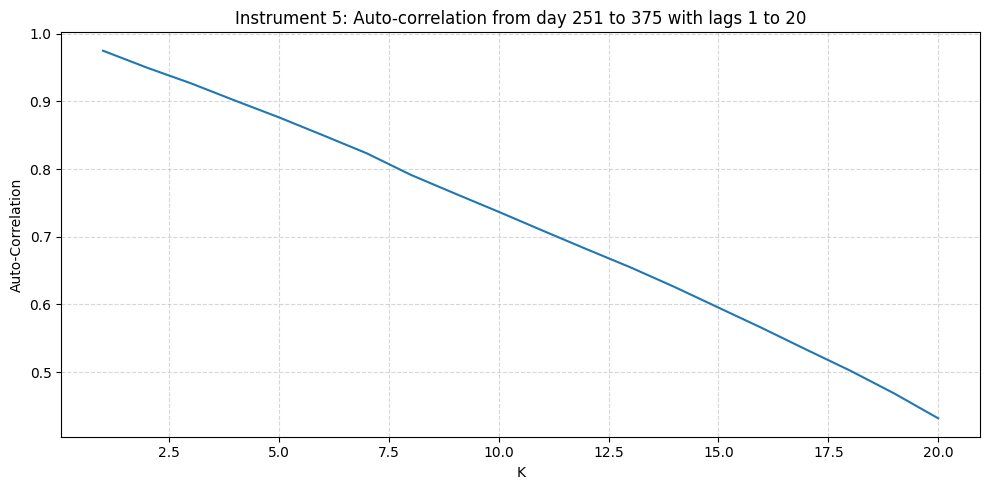

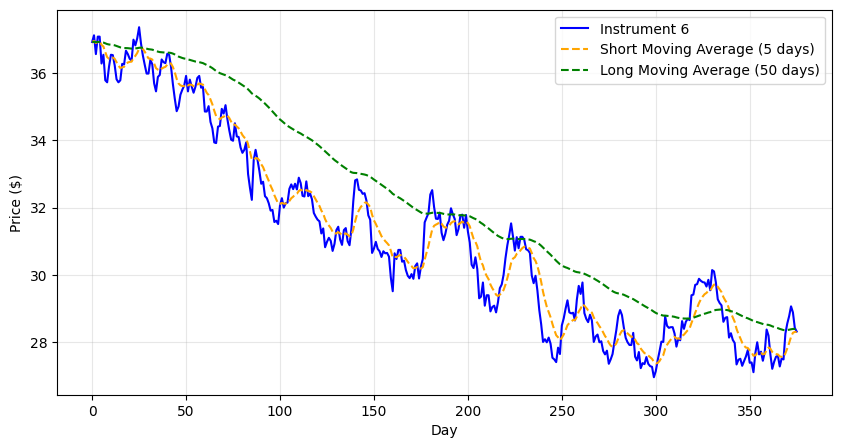

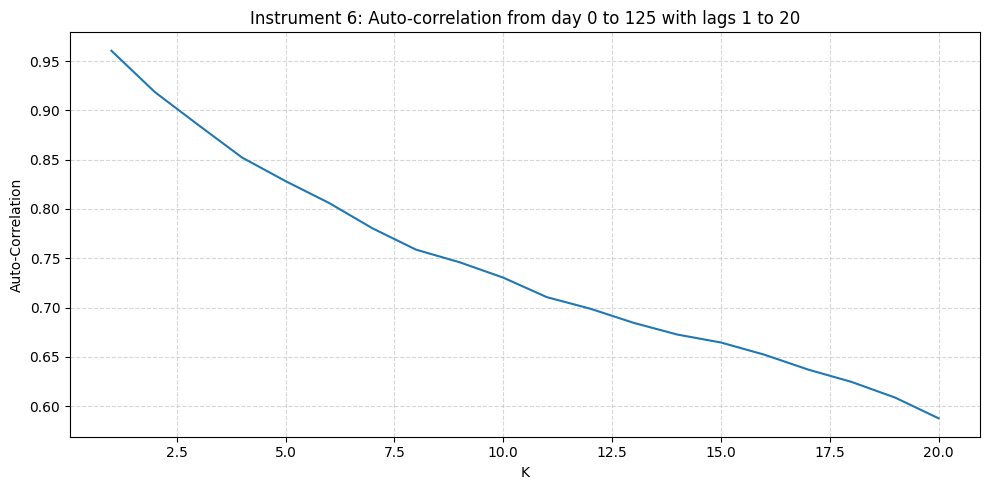

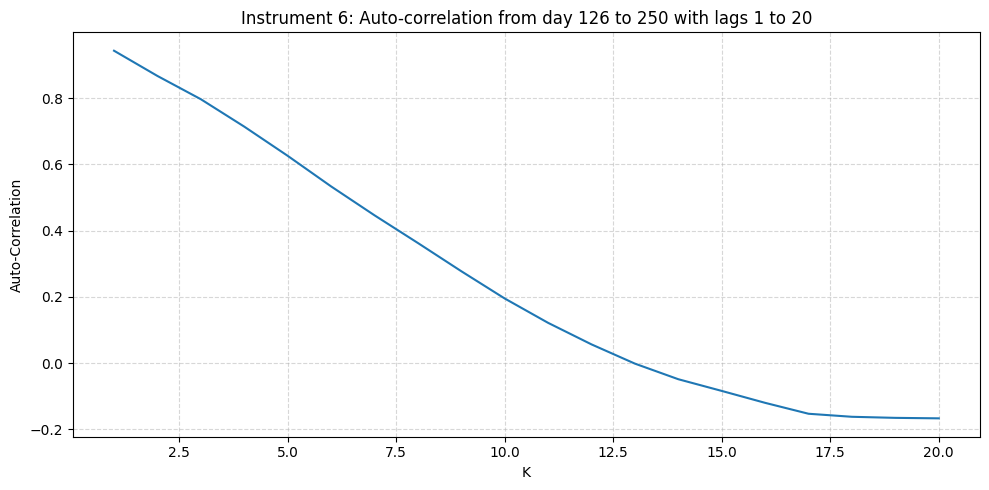

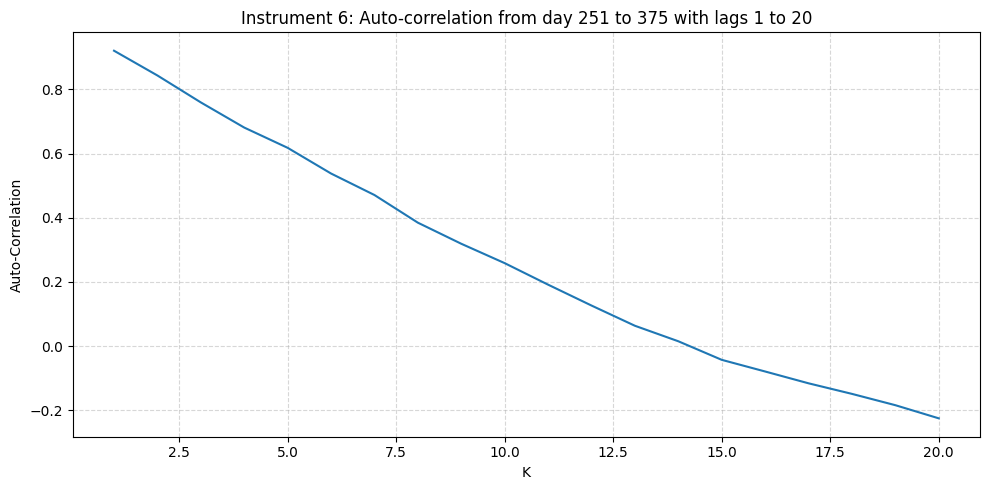

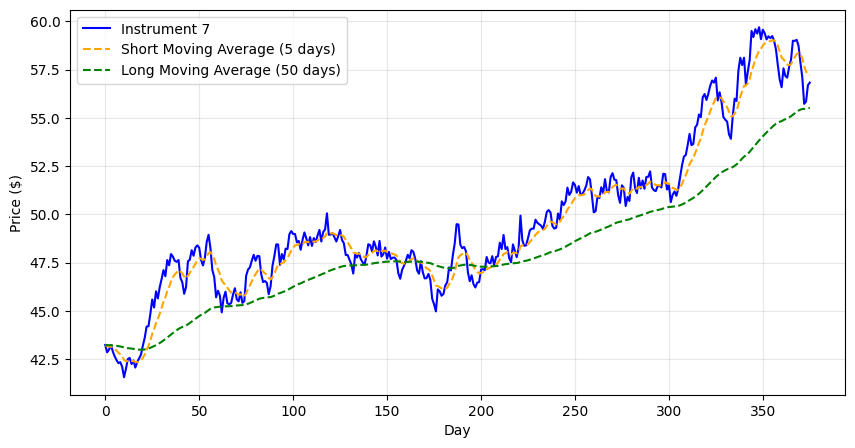

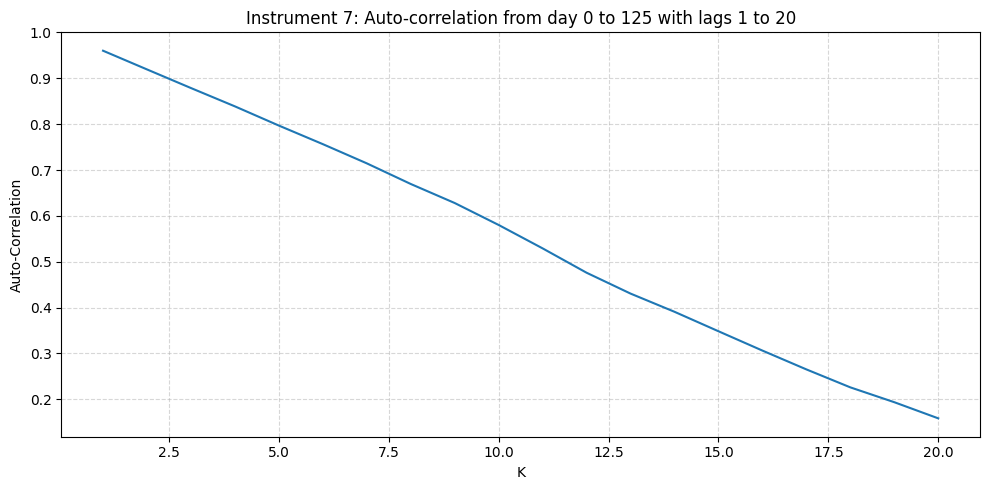

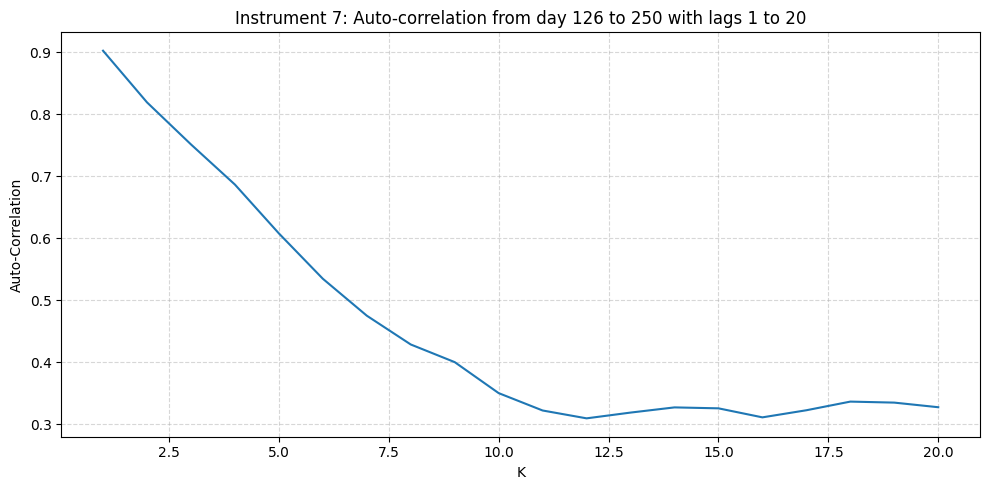

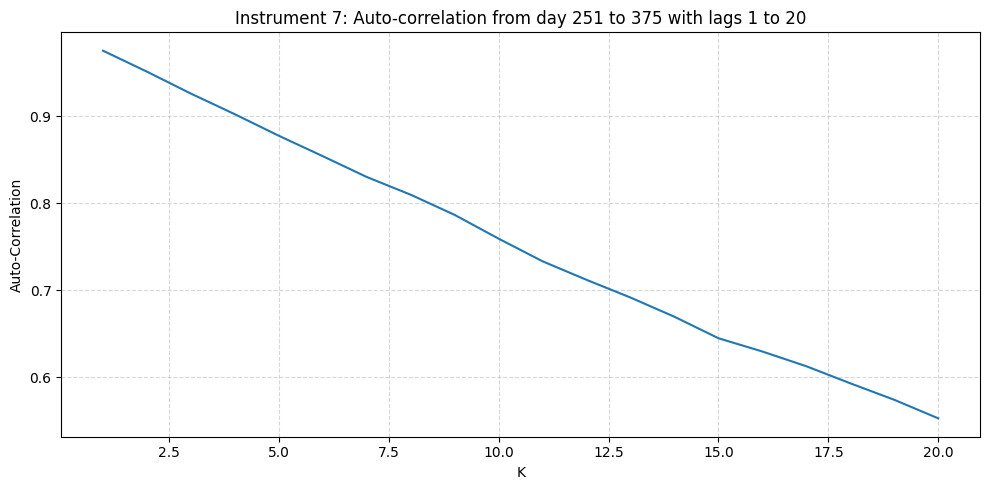

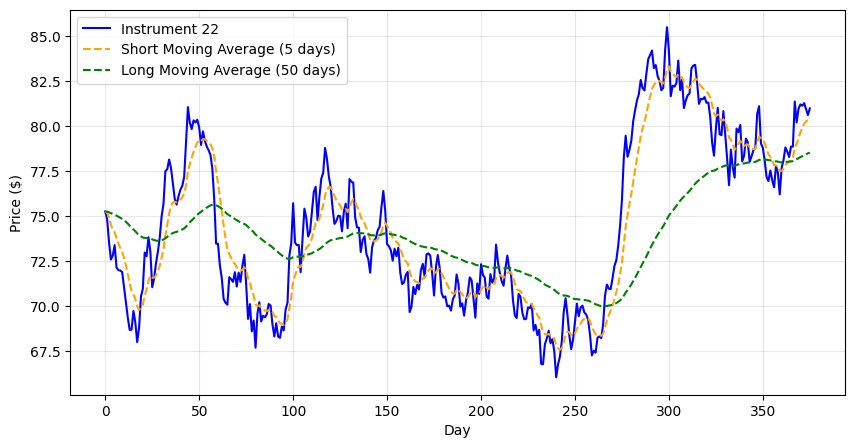

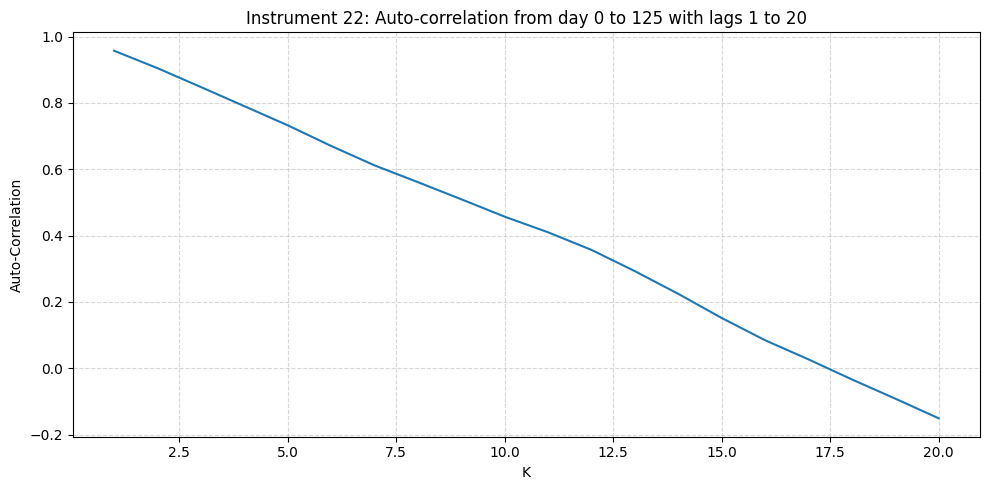

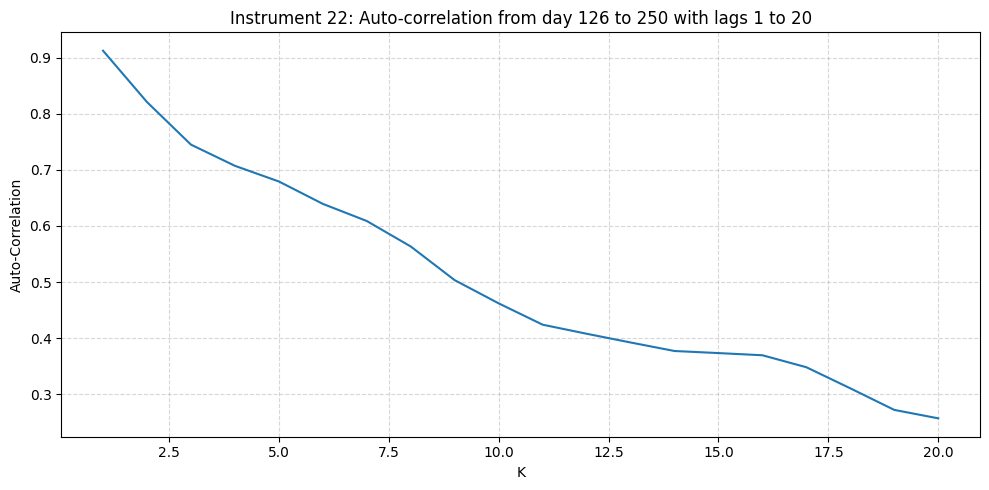

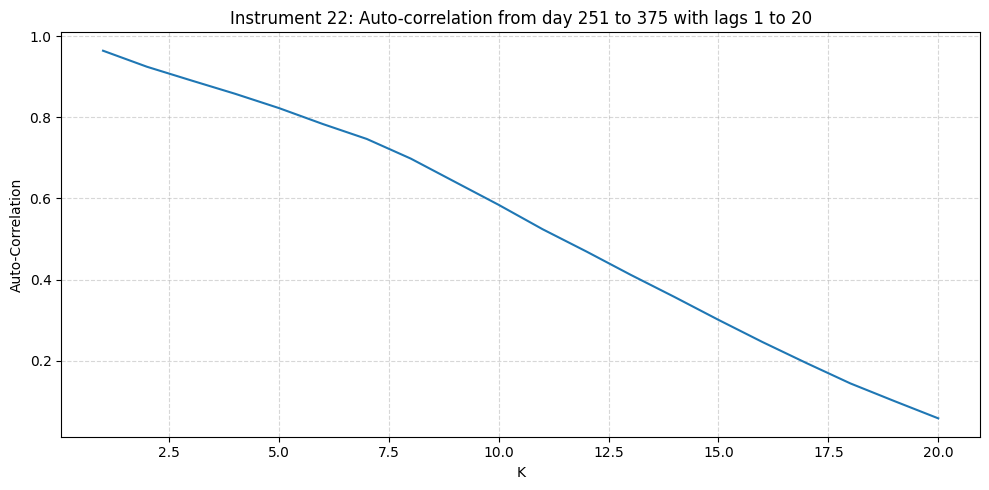

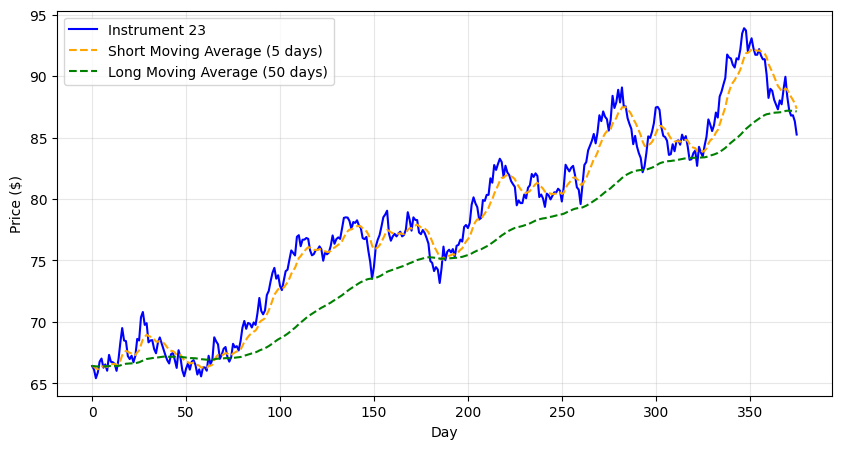

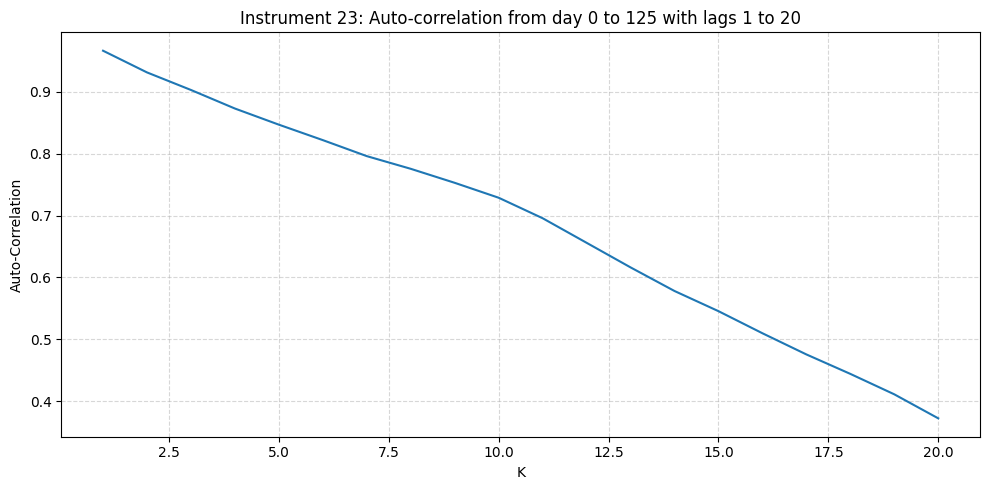

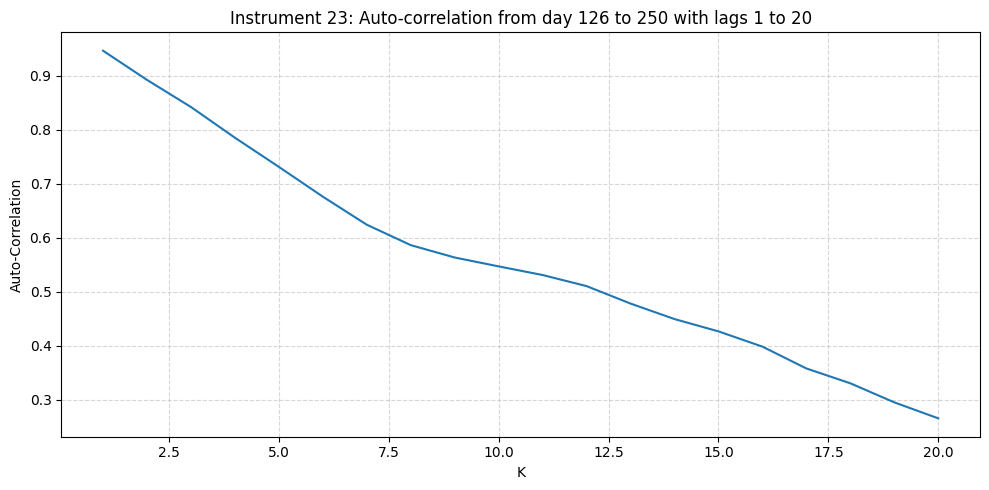

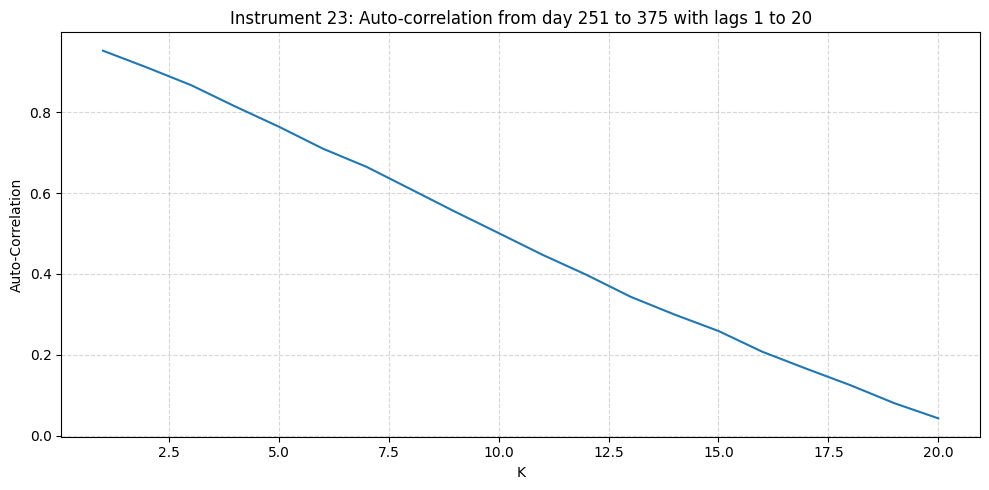

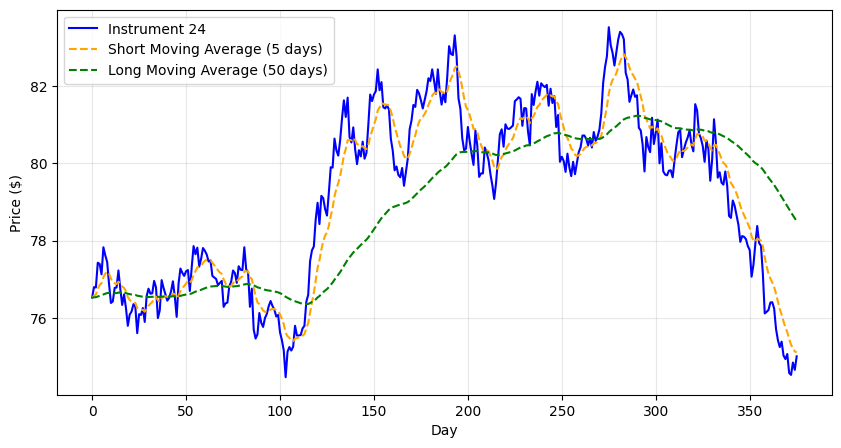

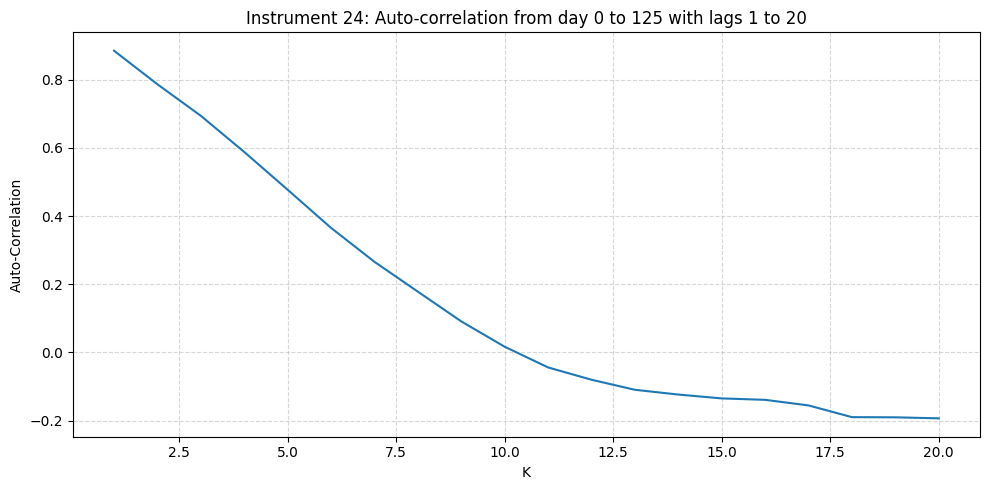

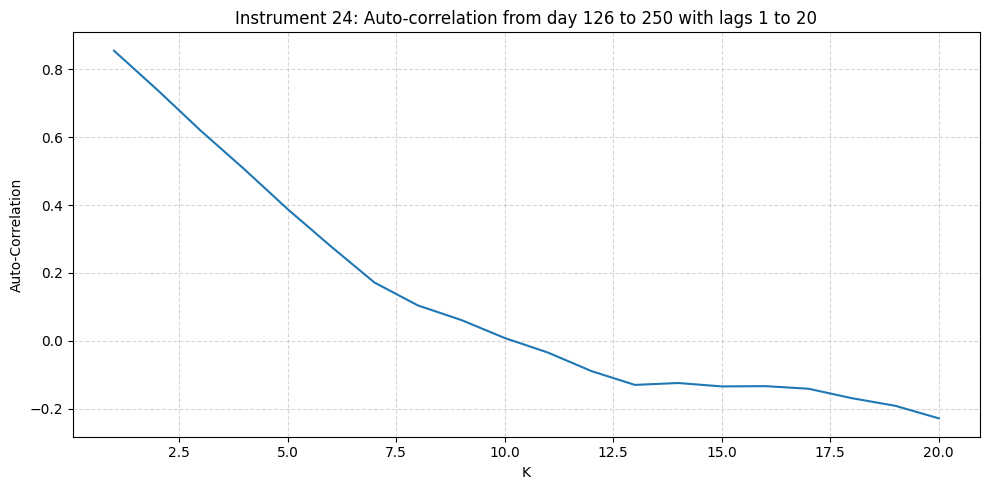

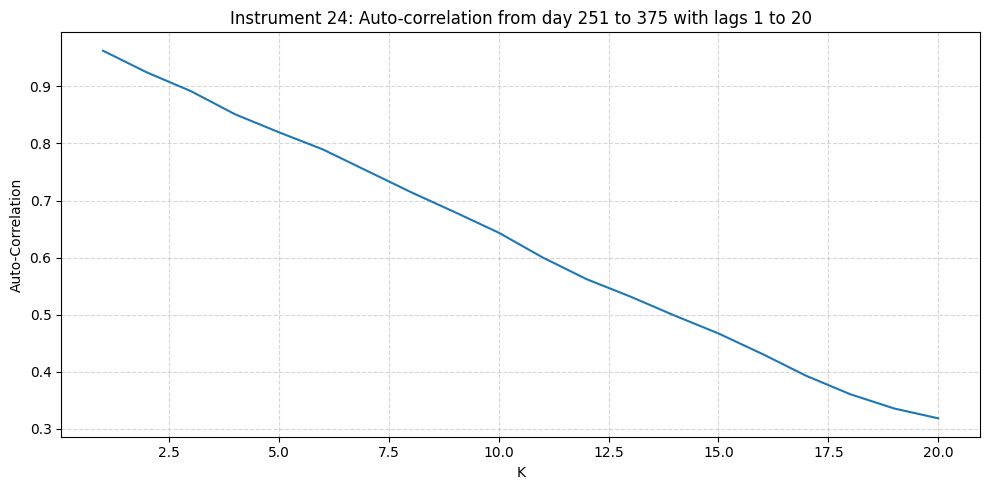

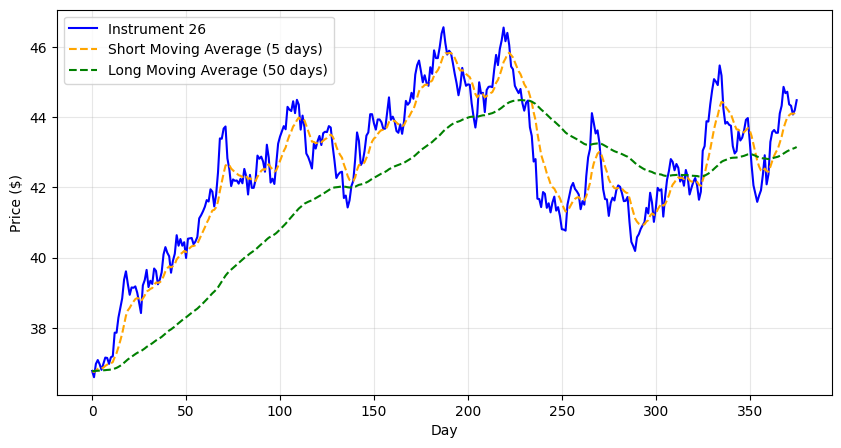

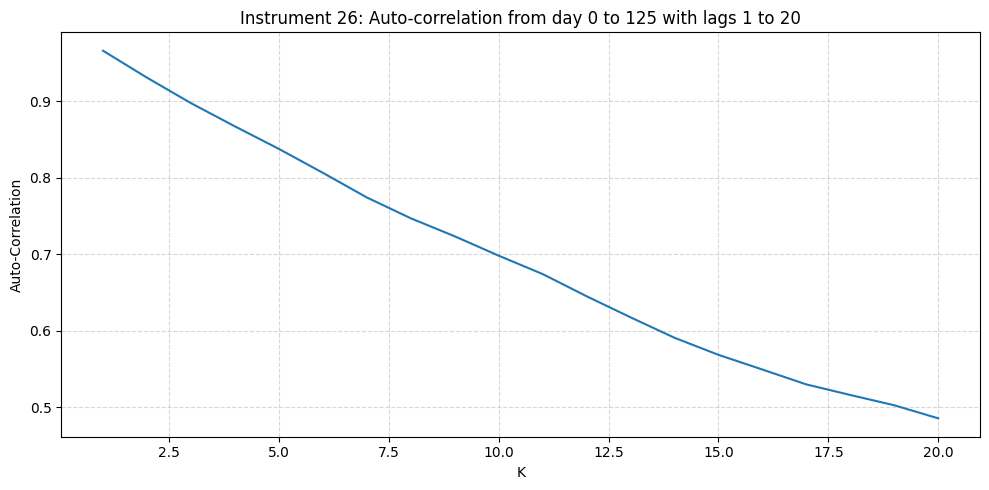

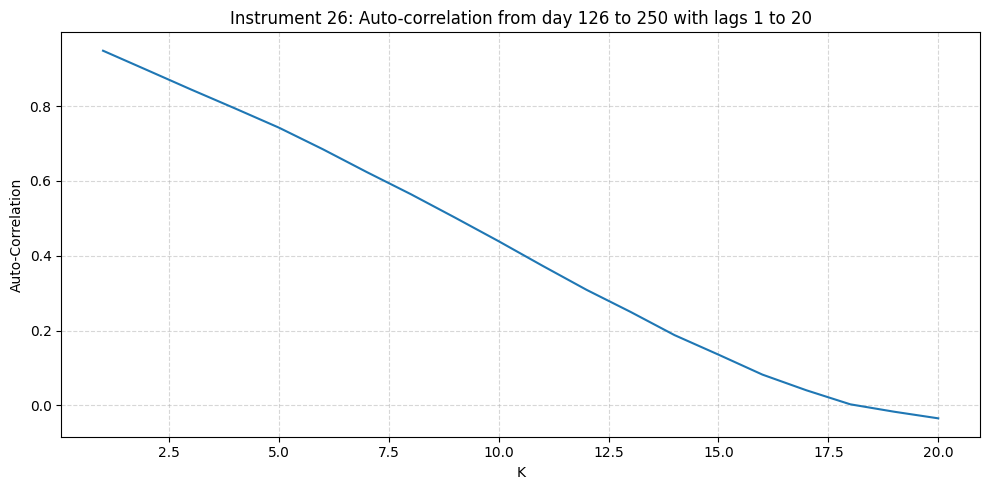

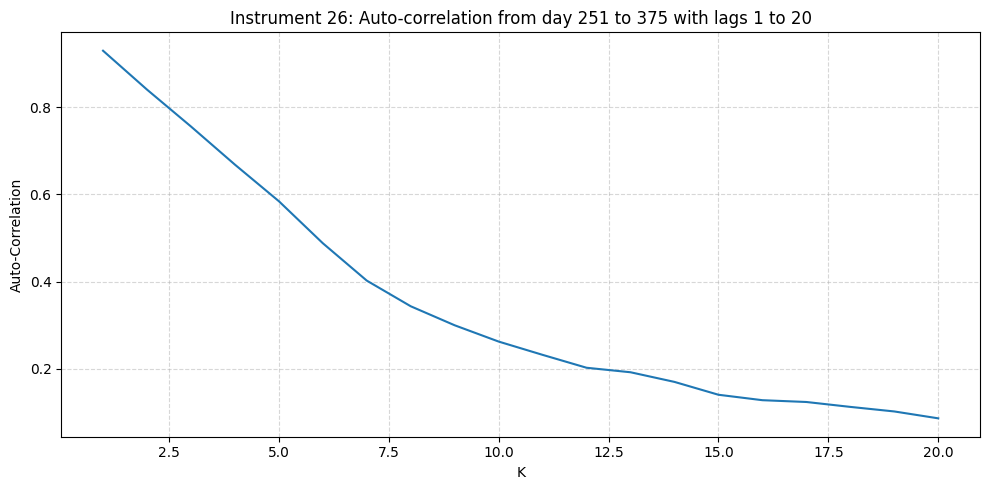

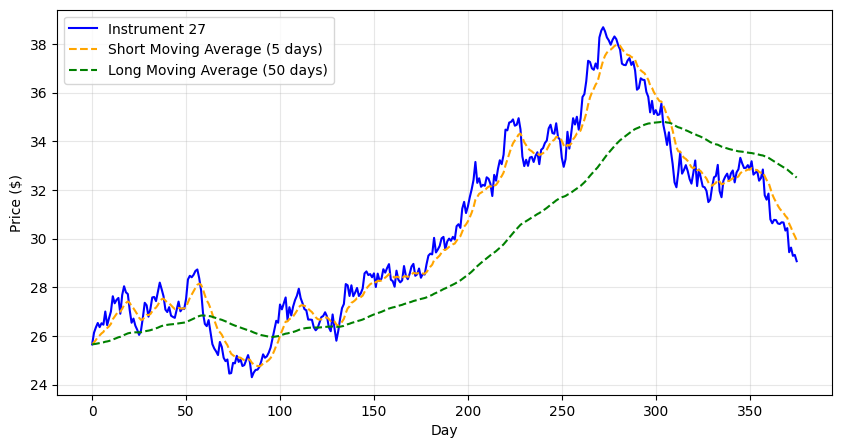

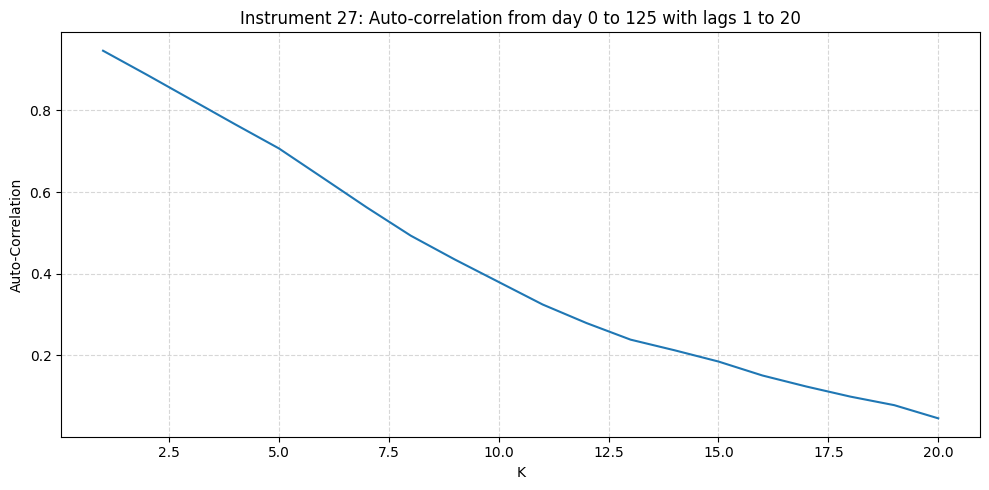

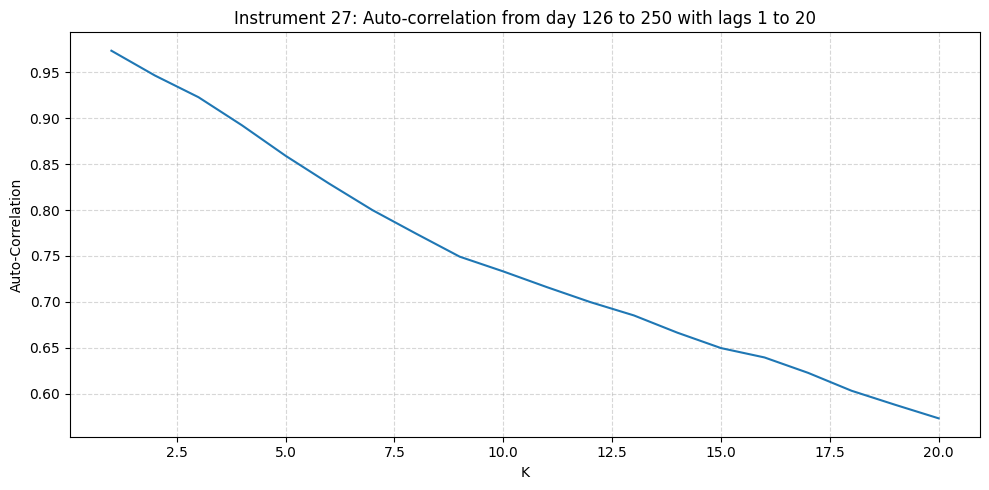

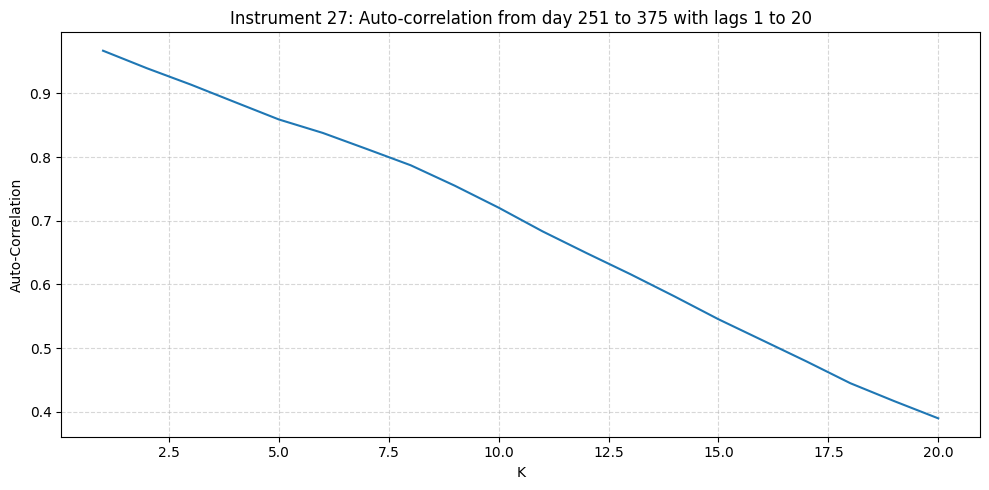

In [9]:
for instrument_no in instrument_nos:
    market_data.plot_ema_crossover(instrument_no, 0, 375, 50, 5)
    market_data.plot_instrument_autocorrelation(instrument_no, 0, 125, 20)
    market_data.plot_instrument_autocorrelation(instrument_no, 126, 250, 20)
    market_data.plot_instrument_autocorrelation(instrument_no, 251, 375, 20)

# Key Takeaways from Analysis

- We can definitely use trending/momentum strategies
- While using these strategies, we can predict bullish or bearish behaviour using EMA crossovers
- However, we need to be conscious of how long we hold assets. We can look at an autocorrelation 
to see if its favourable to hold an asset for x days if autocorrelation(x) > 0.5